# Principal component analysis on MNIST data

Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95\%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Next, evaluate the classifier on the test set.

 - [Split into training and testing data sets](#Split-into-training-and-testing-data-sets)
 - [Model training](#Model-training)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the MNIST data set
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

## Split into training and testing data sets

In [3]:
mnist.__dir__()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
mnist.data.shape

(70000, 784)

In [16]:
training_ratio = 0.8
training_data_set_length = int(len(mnist.data) * training_ratio)
testing_data_set_length = len(mnist.data) - training_data_set_length
shuffled_index = np.random.permutation(len(mnist.data))

In [25]:
X_training_set = mnist.data[shuffled_index[:training_data_set_length]]
X_testing_set = mnist.data[shuffled_index[-testing_data_set_length:]]

In [26]:
print(X_training_set.shape)
print(X_testing_set.shape)

(56000, 784)
(14000, 784)


In [27]:
y_training_set = mnist.target[shuffled_index[:training_data_set_length]]
y_testing_set = mnist.target[shuffled_index[-testing_data_set_length:]]

In [89]:
print(y_training_set.shape)
print(y_testing_set.shape)

(56000,)
(14000,)


## Model training

In [33]:
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=100)

In [35]:
t0 = time()
rf_clf.fit(X_training_set, y_training_set)
print(f'Time elapsed: {time() - t0:.2f} sec')

Time elapsed: 38.51 sec


In [37]:
y_prediction_set = rf_clf.predict(X_testing_set)
print(f'Accuracy score for {rf_clf.__class__.__name__}: {accuracy_score(y_prediction_set, y_testing_set):.4f}')

Accuracy score for RandomForestClassifier: 0.9705


## PCA

In [64]:
from sklearn.decomposition import PCA
pca = PCA()

In [65]:
pca.fit(X_training_set)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [88]:
print(f'Number of reduced dimensions that preserve 95% of the variance: {d}')

Number of reduced dimensions that preserve 95% of the variance: 154


In [104]:
pca = PCA(n_components=d)
X_reduced_training_set = pca.fit_transform(X_training_set)
X_reduced_testing_set = pca.fit_transform(X_testing_set)
# y_reduced_training_set = pca.transform(y_training_set.reshape(-1, 1))
# y_reduced_testing_set = pca.transform(y_testing_set.reshape(-1, 1))

In [105]:
print(X_training_set.shape)
print(X_testing_set.shape)
print(X_reduced_training_set.shape)
print(X_reduced_testing_set.shape)

(56000, 784)
(14000, 784)
(56000, 154)
(14000, 154)


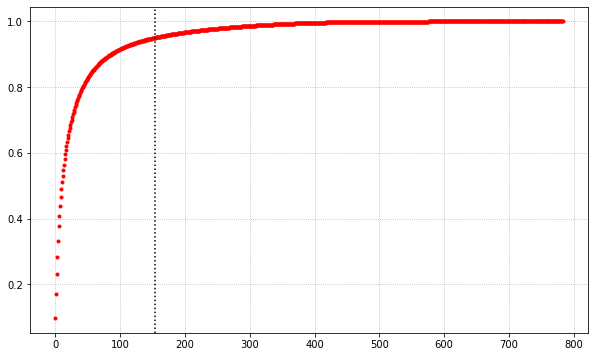

In [87]:
fig, axes = plt.subplots(figsize=(10, 6))
axes.plot(cumsum, 'r.')
axes.axvline(x=d, color='k', linestyle=':')
plt.grid(True, linestyle=':');

In [106]:
t0 = time()
rf_clf.fit(X_reduced_training_set, y_training_set)
print(f'Time elapsed: {time() - t0:.2f} sec')

Time elapsed: 78.93 sec


In [107]:
y_prediction_set = rf_clf.predict(X_reduced_testing_set)
print(f'Accuracy score for {rf_clf.__class__.__name__}: {accuracy_score(y_prediction_set, y_testing_set):.4f}')

Accuracy score for RandomForestClassifier: 0.3689
